<img src="https://t3.ftcdn.net/jpg/02/46/90/58/360_F_246905841_T7icDjfzSbISy7sNadJUg2fOeZR585vR.jpg" alt="Alternative text" />

# **import Libraries**

**Prerequisite for code execution:**



```
! pip install catboost
```



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from scipy import stats
from sklearn.impute import KNNImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
import xgboost as xgb
from catboost import CatBoostRegressor
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, classification_report, mean_squared_error, r2_score

In [2]:
pd.set_option('display.max_columns', 50)

# **Load Data**

In [3]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Filoger/tamrin_quera/ML/Regression/Ex_11/HR.csv")

# **Dataset Overview**

**Dataset Information:**

This dataset includes the following features:

- 1.**satisfaction_level**: This feature indicates the level of job satisfaction and workplace environment for an employee. This value is usually represented as a range from 0 to 1 or from 0 to 100%, where higher values indicate greater satisfaction.

- 2.**last_evaluation**: This feature represents the evaluation of the employee's most recent performance. It's likely a value between 0 and 1 or its equivalent in percentage, indicating the quality of recent performance.

- 3.**number_project**: The number of projects that the employee has been engaged in during their working time.

- 4.**average_monthly_hours**: The average number of monthly working hours for the employee.

- 5.**time_spend_company**: The duration the employee has spent in the company or factory, in other words, their work experience in this job.

- 6.**Work_accident**: A binary variable (yes/no) indicating whether an occupational accident has occurred for the employee.

- 7.**left**: A binary variable (yes/no) indicating whether the employee has left the job. If the value is 1, it indicates that the employee has left the job.
- 8.**promotion_last_5years**: A binary variable (yes/no) indicating whether the employee has been promoted in the last 5 years.

- 9.**sales**: This feature indicates the department or division where the employee works. For example, it can include categories like "sales," "finance," "production," and so on.

- 10.**salary**: This feature represents the employee's salary or wage level and is typically categorized as "low," "medium," and "high."

In [ ]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [ ]:
data.tail()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low
14998,0.37,0.52,2,158,3,0,1,0,support,low


In [ ]:
row, col = data.shape
print(f"Number of Row: {row}")
print(f"Number of Columns: {col}")

Number of Row: 14999
Number of Columns: 10


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [ ]:
data.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary'],
      dtype='object')

In [ ]:
data.nunique()

satisfaction_level        92
last_evaluation           65
number_project             6
average_montly_hours     215
time_spend_company         8
Work_accident              2
left                       2
promotion_last_5years      2
sales                     10
salary                     3
dtype: int64

# **EDA**

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
satisfaction_level,14999.0,0.612834,0.248631,0.09,0.44,0.64,0.82,1.0
last_evaluation,14999.0,0.716102,0.171169,0.36,0.56,0.72,0.87,1.0
number_project,14999.0,3.803054,1.232592,2.00,3.00,4.00,5.00,7.0
average_montly_hours,14999.0,201.050337,49.943099,96.00,156.00,200.00,245.00,310.0
time_spend_company,14999.0,3.498233,1.460136,2.00,3.00,3.00,4.00,10.0
Work_accident,14999.0,0.144610,0.351719,0.00,0.00,0.00,0.00,1.0
left,14999.0,0.238083,0.425924,0.00,0.00,0.00,0.00,1.0
promotion_last_5years,14999.0,0.021268,0.144281,0.00,0.00,0.00,0.00,1.0


In [ ]:
data.describe(exclude="number").T

,count,unique,top,freq
sales,14999,10,sales,4140
salary,14999,3,low,7316


In [ ]:
data.groupby('left').mean().T.style.background_gradient(cmap='coolwarm')

<ipython-input-17-bfbc855081ce>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby('left').mean().T.style.background_gradient(cmap='coolwarm')


left,0,1
satisfaction_level,0.666810,0.440098
last_evaluation,0.715473,0.718113
number_project,3.786664,3.855503
average_montly_hours,199.060203,207.419210
time_spend_company,3.380032,3.876505
Work_accident,0.175009,0.047326
promotion_last_5years,0.026251,0.005321


- **above table shows that those who left that has 44% satisfaction and they are worked more hours 207 but they are not promoted in last 5 years so that's why they are leaving the job**

<ipython-input-18-ba637e12d441>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = sns.heatmap(data.corr(), annot=True, fmt=".2f", cmap="coolwarm")


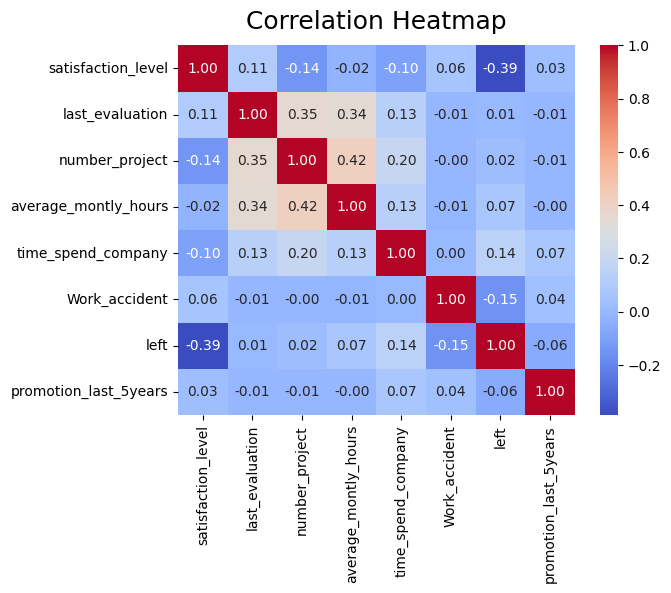

In [ ]:
heatmap = sns.heatmap(data.corr(), annot=True, fmt=".2f", cmap="coolwarm")
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);

<ipython-input-19-8b751142bb53>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()[["left"]].sort_values(by="left", ascending=False),


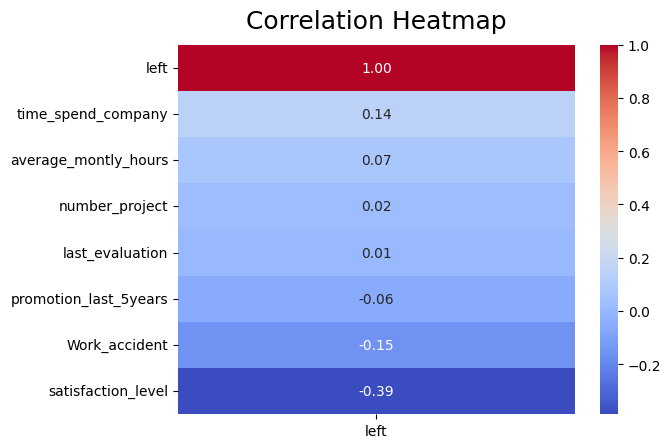

In [ ]:
heatmap = sns.heatmap(
    data.corr()[["left"]].sort_values(by="left", ascending=False),
    annot=True, fmt=".2f", cmap="coolwarm"
)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);

- **The features with highest correlations are 'last_evaluation', 'number_project', 'average_montly_hours', and 'time_spend_company'.**


---

- **We see from the correlation heatmap that the correlation of the target with all the features is low. Moreover, the pairwise distributions indicate that the linear model might not perform well.**

## **Distribution of cancellations based on features**

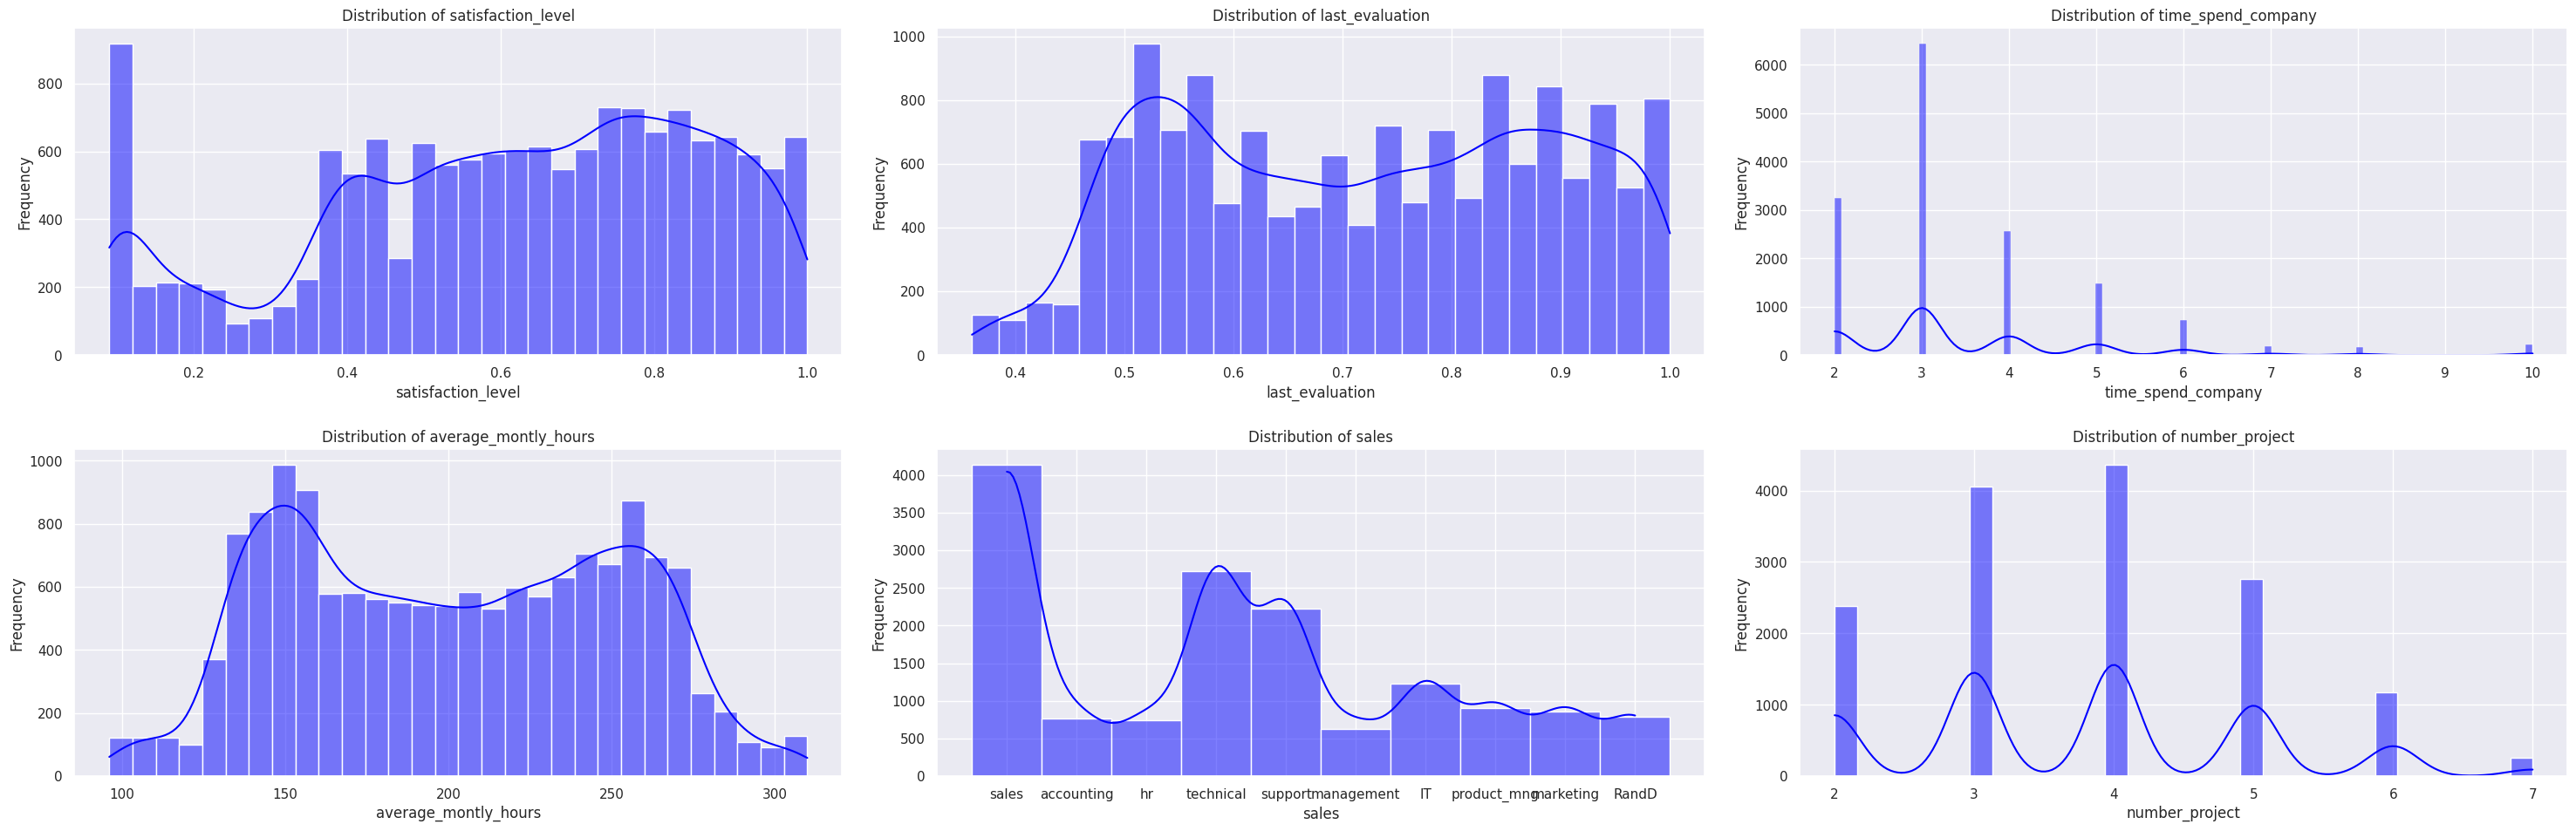

In [ ]:
def plot_distributions(data, color="blue"):
    """
    This function takes a pandas DataFrame as input and plots the distribution of each feature
    in a single figure. The number of rows and columns in the figure is determined dynamically
    based on the number of features in the DataFrame. The "darkgrid" theme from seaborn is applied
    to the plots. You can specify a color for the bars in the histogram by passing a "color" parameter.
    """
    sns.set_theme(style='darkgrid')  # set the seaborn theme

    n_cols = 3  # set the number of columns per row
    num_features = len(data.columns)
    n_rows = math.ceil(num_features / n_cols)

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(30, 5*n_rows))
    plt.subplots_adjust(wspace=0.8, hspace=0.5 , bottom=0.30)

    for i, columns in enumerate(data.columns):
        row = i // n_cols
        col = i % n_cols

        sns.histplot(data=data, kde=True, x=columns, ax=axes[row, col], color=color)
        axes[row, col].set_title(f'Distribution of {columns}')
        axes[row, col].set_xlabel(columns)
        axes[row, col].set_ylabel('Frequency')

    fig.tight_layout(pad=2.0)
    plt.show

selected_col_hist = [
    "satisfaction_level", "last_evaluation", "time_spend_company",
    "average_montly_hours", "sales", "number_project"
]

plot_distributions(data[selected_col_hist])



> **Insights**

- Employee satisfaction peaks at 80% and begins to drop off.
- More employees reported an evaluation score of around .50.
- Avg Monthly Hours peaks at 150 and 260 hours a month. Thus, this feature has a bi-modal distribution.
- Number of projects is normally distributed with a mode of ~ 4 projects .
- The majority of employees at this company have a tenure of just under 3 years. The distribution of this feature is skewed to the right, which could be due to outliers.

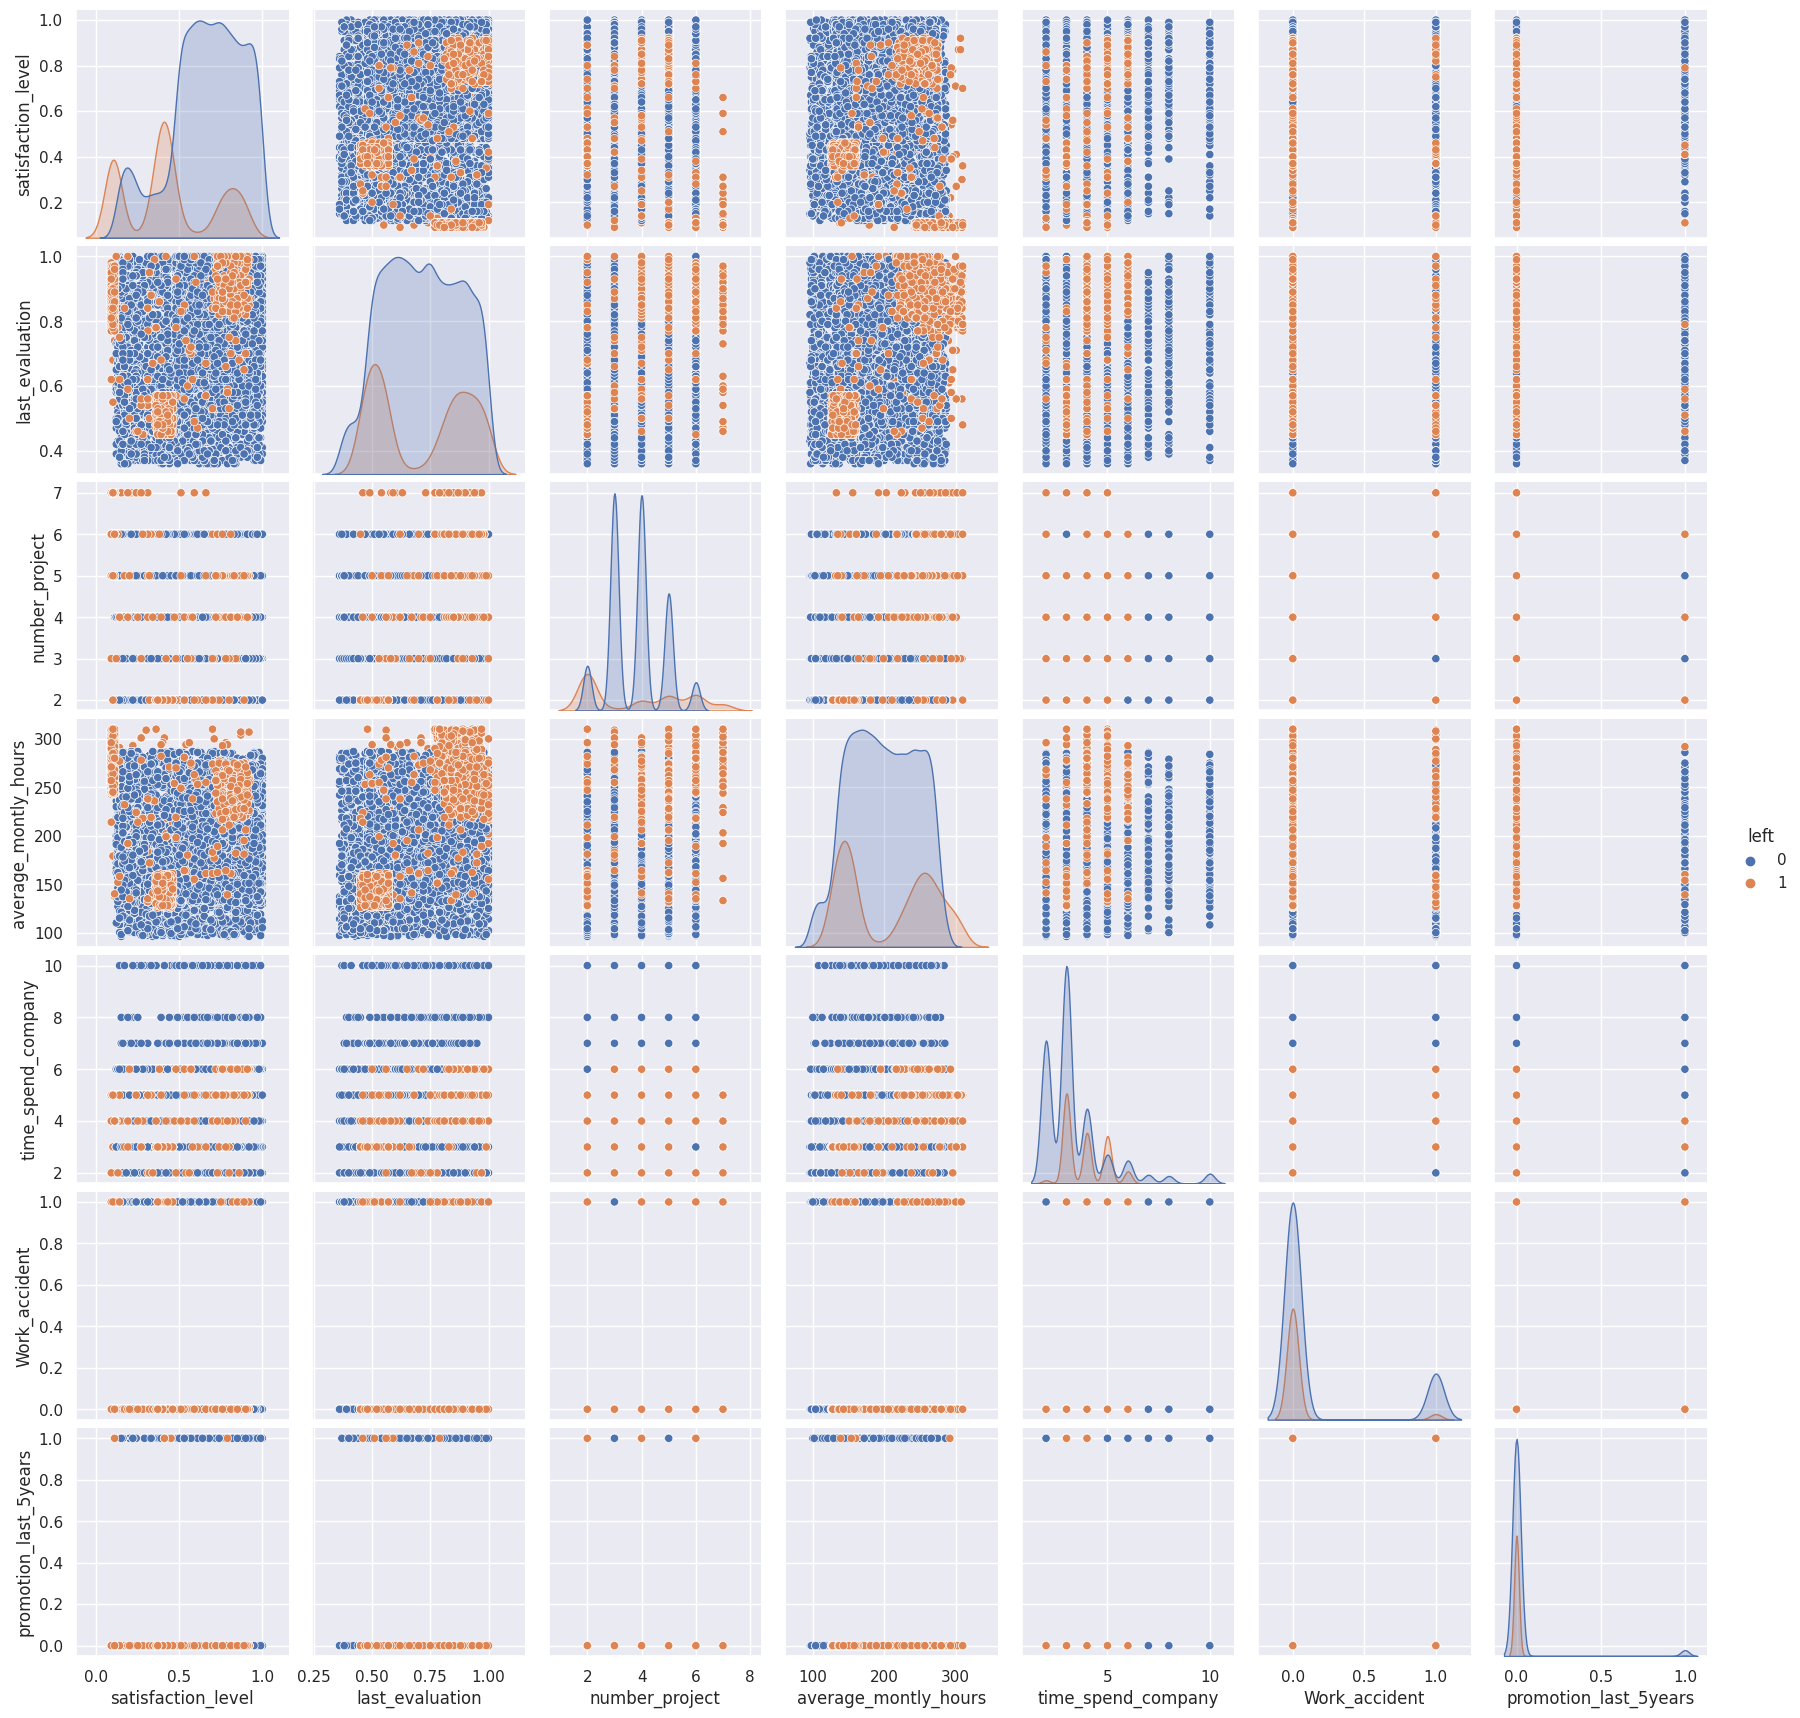

In [ ]:
sns.pairplot(data=data, hue="left")

## **The status of the number of workers who have left their jobs**

In [ ]:
data["left"].value_counts()

0    11428
1     3571
Name: left, dtype: int64

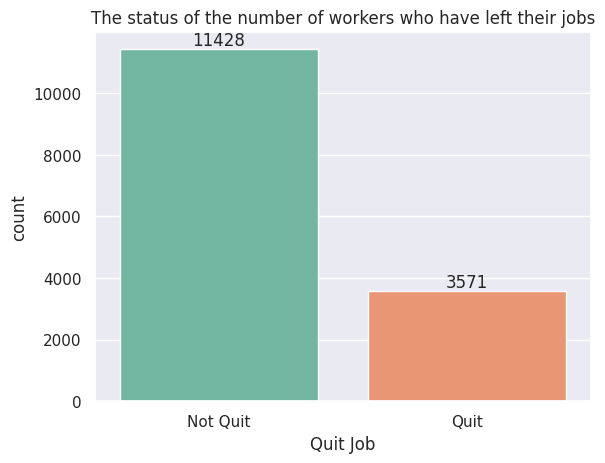

In [ ]:
ax = sns.countplot(data=data, x="left", palette="Set2")
ax.bar_label(ax.containers[0]);
plt.xlabel("Quit Job")
plt.title("The status of the number of workers who have left their jobs")
plt.xticks([0, 1], ["Not Quit", "Quit"]);

## **The effect of satisfaction on leaving the job**

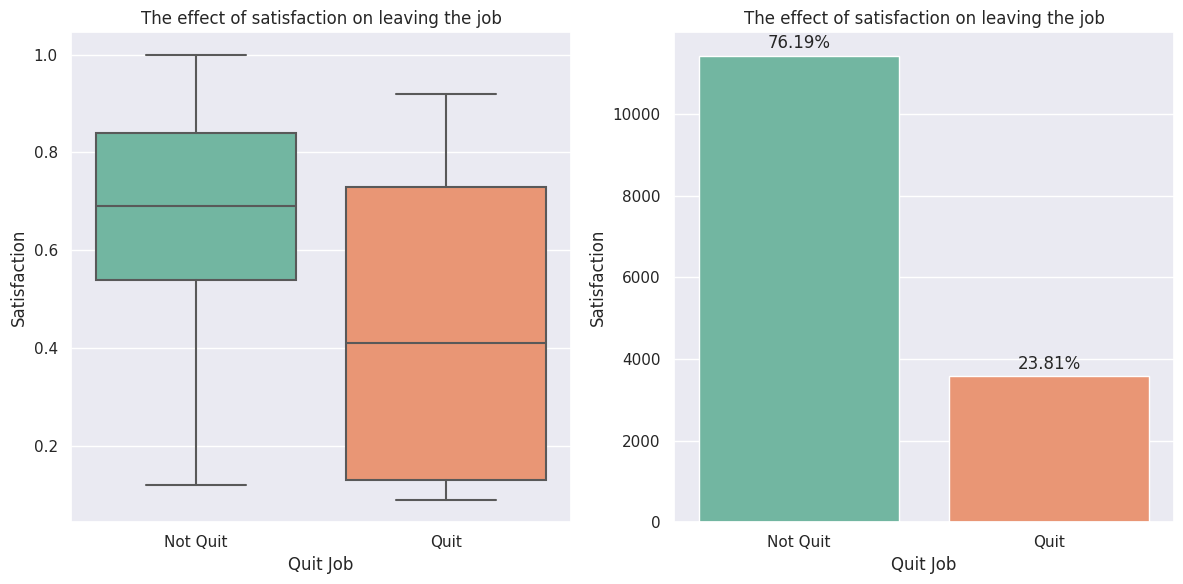

In [ ]:
fig , axes = plt.subplots(1, 2, figsize=(12, 6))
sns.boxplot(data=data, x="left", y="satisfaction_level", palette="Set2", ax=axes[0])
axes[0].set_xlabel("Quit Job")
axes[0].set_ylabel("Satisfaction")
axes[0].set_title("The effect of satisfaction on leaving the job")
axes[0].set_xticks([0, 1], ["Not Quit", "Quit"]);



sns.countplot(data=data, x="left", palette="Set2", ax=axes[1])
axes[1].set_xlabel("Quit Job")
axes[1].set_ylabel("Satisfaction")
axes[1].set_title("The effect of satisfaction on leaving the job")
axes[1].set_xticks([0, 1], ["Not Quit", "Quit"]);

for p in axes[1].patches:
    percentage = p.get_height() / len(data) * 100
    axes[1].annotate(f'{percentage:.2f}%',
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha = 'center', va = 'center',
                     xytext = (0, 9),
                     textcoords = 'offset points')



plt.tight_layout()
plt.show()

## **The status of the number of workers who have seen ascites at work and have left work**

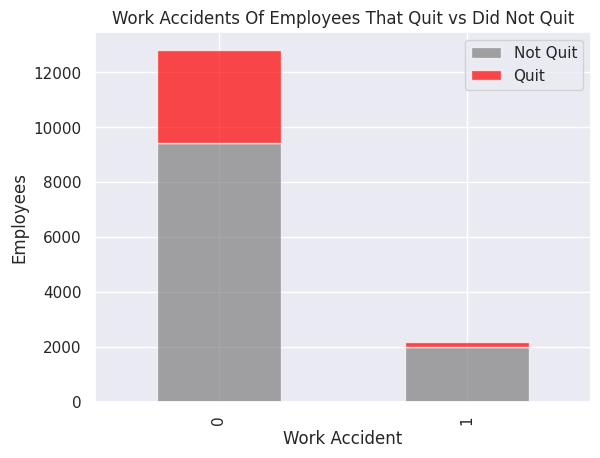

In [ ]:
accident = data.groupby(["Work_accident", "left"]).Work_accident.count().unstack()
p1 = accident.plot(kind = "bar", stacked = True,
                   title = "Work Accidents Of Employees That Quit vs Did Not Quit",
                   color = ["grey","red"], alpha = .70)
p1.set_xlabel("Work Accident")
p1.set_ylabel("Employees")
p1.legend(["Not Quit","Quit"])
plt.show()

## **Distribution of work departments based on leaving the job**

In [ ]:
data["sales"].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

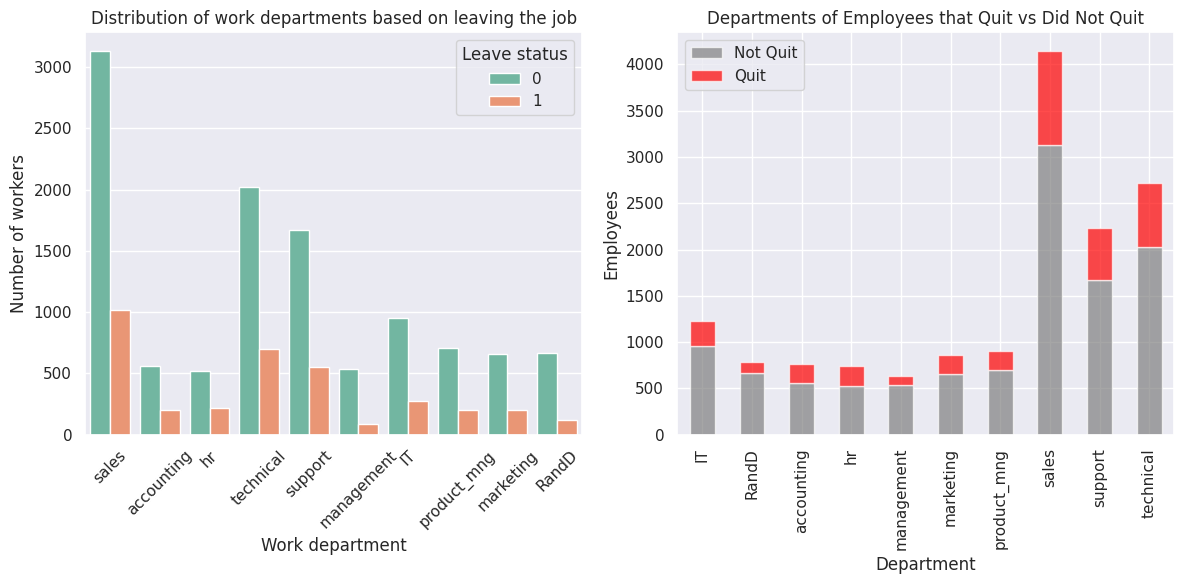

In [ ]:
fig , ax = plt.subplots(1, 2, figsize=(12, 6))
sns.countplot(data=data, x="sales", hue="left", palette="Set2", ax=ax[0])
ax[0].set_xlabel("Work department")
ax[0].set_ylabel("Number of workers")
ax[0].set_title("Distribution of work departments based on leaving the job")
ax[0].set_xticklabels(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], rotation=45)
ax[0].legend(title="Leave status")

sales_left = data.groupby(['sales','left']).sales.count().unstack()
p3 = sales_left.plot(kind = 'bar', stacked = True,
                    title = 'Departments of Employees that Quit vs Did Not Quit',
                    color = ['grey','red'], alpha = .70, ax=ax[1])
ax[1].set_xlabel('Department')
ax[1].set_ylabel('Employees')
ax[1].legend(['Not Quit', 'Quit'])


plt.tight_layout()
plt.show()

## **Chart of average monthly working hours based on the number of projects**

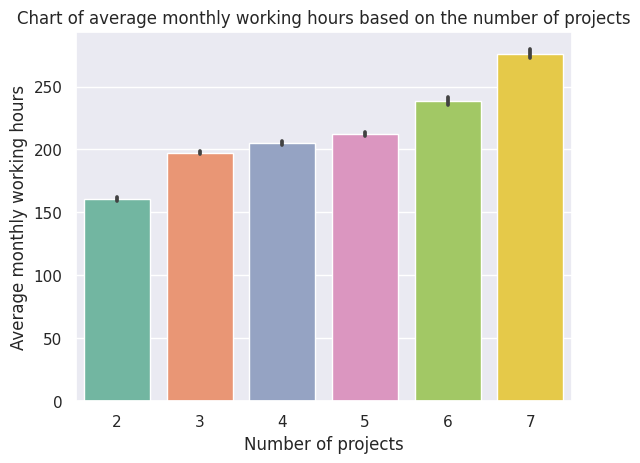

In [ ]:
sns.barplot(data=data, x="number_project", y="average_montly_hours", palette="Set2")
plt.xlabel("Number of projects")
plt.ylabel("Average monthly working hours")
plt.title("Chart of average monthly working hours based on the number of projects")
plt.show()

## **Time spent in company based on salary**

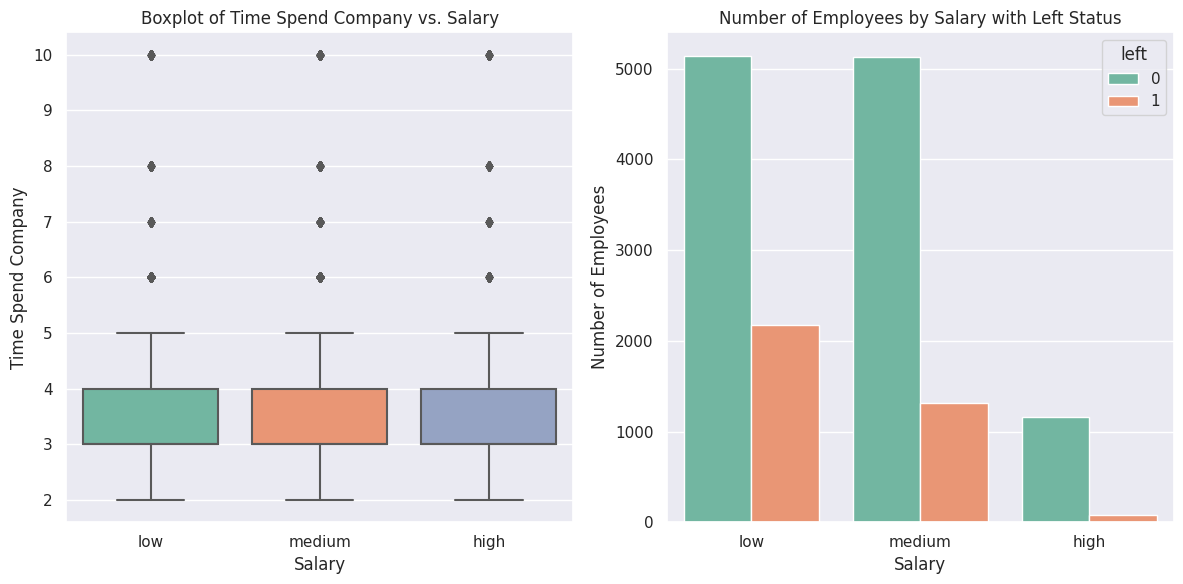

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.boxplot(data=data, x='salary', y='time_spend_company', palette="Set2", ax=axes[0])
axes[0].set_xlabel('Salary')
axes[0].set_ylabel('Time Spend Company')
axes[0].set_title('Boxplot of Time Spend Company vs. Salary')


sns.countplot(data=data, x="salary", hue="left", palette="Set2", ax=axes[1])
axes[1].set_xlabel('Salary')
axes[1].set_ylabel('Number of Employees')
axes[1].set_title('Number of Employees by Salary with Left Status')


plt.tight_layout()
plt.show()

**Categorical Variable Insights**

- **It is to expect that the target should depend on the salary. An employee with lower salary should have bigger probability to leave. This is also indicated in the diagram below.**

- **A small proportion of employees who suffered a work accident end up quitting.**
- **All the employees that quit have not had a promotion in the last 5 years.**
- **Among the employees that left, a greater proportion work in Sales, Tech, and Support Departments.**
- **A very low proportion of high salaried employees quit.**

## **The status of leaving the workers who have been promoted in the last 5 years**

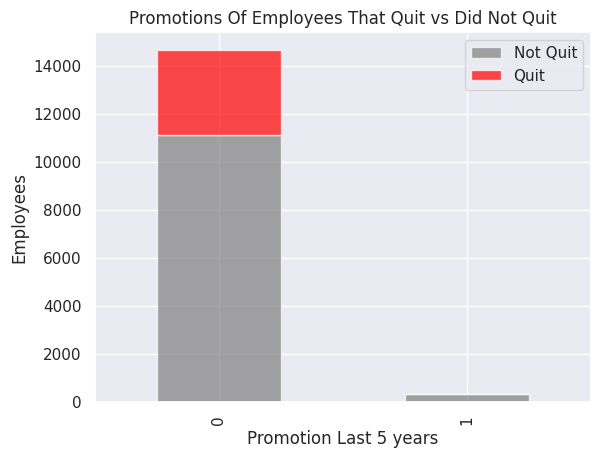

In [ ]:
promotion = data.groupby(["promotion_last_5years", "left"]).promotion_last_5years.count().unstack()
p2 = promotion.plot(kind = "bar", stacked = True,
                    title = "Promotions Of Employees That Quit vs Did Not Quit",
                    color = ["grey", "red"], alpha = .70)
p2.set_xlabel("Promotion Last 5 years")
p2.set_ylabel("Employees")
p2.legend(["Not Quit", "Quit"])
plt.show()

**Employees That Stay**

- **The median satisfaction level of employees that quit is approx. 69%.**
- **They have 4 projects and work 198 hours a month, on average (49.5 hours/week).**
- **The average tenure of these individuals is 4 years.**

---

**Employees that Quit**

- **The median satisfaction level is just 41% and clock in 224 hours a month (~56 hours/week).**
- **There are no employees that quit after 6 years of tenure.**


## **EDA CONCLUSIONS**
Features that greatly influence a person's likelihood of leaving the company are as follows:

- **Salary**: Not surprisingly, a very small proportion of high salaried employees leave the company. There is a higher proportion of employees that quit among the mid or low salary groups.

- **Time with Company**: The three year mark seems to be a critical point in an employee's career. Individuals who are going to quit, tend do so around the three year mark with the company. Once a person reaches 6 years of tenure, they are very unlikely to leave at that point.

- **Number Of Projects**: In addition to tenure, employee engagement is another contributing factor to a person's likelihood of leaving the company. Employees that quit are assigned to a low number of projects relative to their colleagues that work on many projects and tend to stay with the company.

- **Promotions**: Whether an employee is moving up in the organization is also a feature of interest. Employees are far more likely to quit if they haven't recevied a promotion in the last 5 years.

- **Department**: Individuals that works in Sales, Tech, or Support Departments has a greater likelihood of leaving the company relative to employees of other departments.

## **duplicated**

In [ ]:
duplicate_rows = data[data.duplicated()]
print("Number of duplicate data: ", len(duplicate_rows))

Number of duplicate data:  3008


In [ ]:
data[data.duplicated()]

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


## **Outlier Data**

<function matplotlib.pyplot.show(close=None, block=None)>

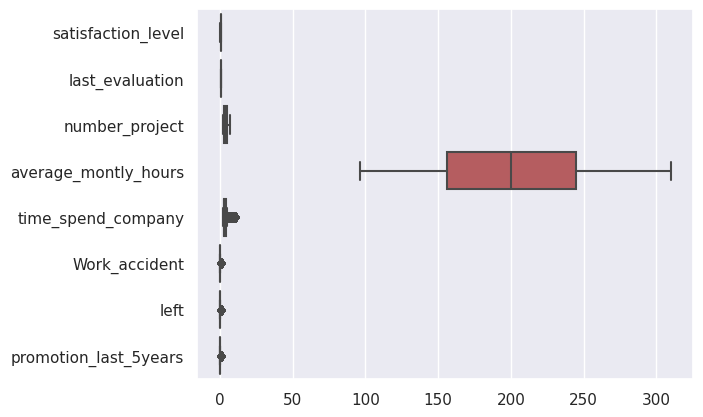

In [ ]:
sns.boxplot(data=data, orient="h")
plt.show

In [19]:
# Identify outliers using a simple method (1.5 * IQR)
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find columns with potential outliers
cols_with_outliers = (data < lower_bound) | (data > upper_bound)

# List columns with potential outliers
cols_to_drop = cols_with_outliers.any()[cols_with_outliers.any()].index.tolist()
cols_to_drop

['time_spend_company', 'Work_accident', 'left', 'promotion_last_5years']

## **Missing Values**

In [ ]:
missing_val = pd.DataFrame(data.isna().sum() / data.shape[0], columns=["pct_missing"])
missing_val["number_of_missing"] = data.isna().sum()
missing_val.style.background_gradient()

,pct_missing,number_of_missing
satisfaction_level,0.000000,0
last_evaluation,0.000000,0
number_project,0.000000,0
average_montly_hours,0.000000,0
time_spend_company,0.000000,0
Work_accident,0.000000,0
left,0.000000,0
promotion_last_5years,0.000000,0
sales,0.000000,0
salary,0.000000,0


# **preprocessing**

In [4]:
# LabelEncoder
label_columns = ["sales", "salary"]

le = LabelEncoder()

for col in label_columns:
    data[col] = le.fit_transform(data[col])

# Convert dummis
sales = pd.get_dummies(data["sales"])

salary = pd.get_dummies(data["salary"])

# Add new dummy columns to data frame
df_dummies = pd.concat([data, sales, salary], axis=1)

# Drop unnecessary columns
df_dummies.drop(["sales", "salary"], axis=1, inplace=True)
df_dummies.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,0,1,2,3,4,5,6,7,8,9,0,1,2
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0


# **Modeling**

In [5]:
X = df_dummies.drop("left", axis=1)
y = df_dummies["left"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=380)

X_train = X_train.astype(float)
X_test = X_test.astype(float)

X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)

In [8]:
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

### **DecisionTreeRegressor**

In [10]:
dtr = DecisionTreeRegressor(random_state=42)
dtr.fit(X_train, y_train)
y_pred_dtr = dtr.predict(X_test)
print(r2_score(y_test, y_pred_dtr))
print(mean_squared_error(y_test, y_pred_dtr))
#print(classification_report(y_test, y_pred_dtr))

0.7849083792792046
0.039881481481481476


### **SVR**

In [11]:
svmr = SVR()
svmr.fit(X_train, y_train)
y_pred_svmr = svmr.predict(X_test)
print(r2_score(y_test, y_pred_svmr))
print(mean_squared_error(y_test, y_pred_svmr))

0.715501272505243
0.052750686865740026


### **KNeighborsRegressor**

In [12]:
KNR = KNeighborsRegressor()
KNR.fit(X_train, y_train)
y_pred_knr = KNR.predict(X_test)
print(r2_score(y_test, y_pred_knr))
print(mean_squared_error(y_test, y_pred_knr))
#print(classification_report(y_test, y_pred))

0.7658601465972441
0.04341333333333334


### **RandomForestRegressor**

In [13]:
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print(r2_score(y_test, y_pred_rf))
print(mean_squared_error(y_test, y_pred_rf))

0.8710497540157254
0.023909470903703704


### **AdaBoostRegressor**

In [14]:
ada = AdaBoostRegressor(random_state=42)
ada.fit(X_train, y_train)
y_pred_ada = ada.predict(X_test)
print(r2_score(y_test, y_pred_ada ))
print(mean_squared_error(y_test, y_pred_ada ))

0.6628993359110031
0.06250394063333518


### **XGBRegressor**

In [15]:
xgb_reg = xgb.XGBRegressor(colsample_bytree=0.8, learning_rate=0.1, max_depth=6, n_estimators=1000, verbosity=3, random_state=42)

xgb_reg.fit(X_train, y_train)

y_pred_xgb = xgb_reg.predict(X_test)

mae = mean_squared_error(y_test, y_pred_xgb)
r2 = r2_score(y_test, y_pred_xgb)

metric_xgb = {
    "Mean Squared Error": mae,
    "R2 Score": r2
}

for key, value in metric_xgb.items():
    print(f"{key}: {value}")
    print("-"*50)

[08:10:10] DEBUG: ../src/gbm/gbtree.cc:157: Using tree method: 2
[08:10:10] INFO: ../src/tree/updater_prune.cc:98: tree pruning end, 62 extra nodes, 0 pruned nodes, max_depth=6
[08:10:10] INFO: ../src/tree/updater_prune.cc:98: tree pruning end, 68 extra nodes, 0 pruned nodes, max_depth=6
[08:10:10] INFO: ../src/tree/updater_prune.cc:98: tree pruning end, 64 extra nodes, 0 pruned nodes, max_depth=6
[08:10:10] INFO: ../src/tree/updater_prune.cc:98: tree pruning end, 68 extra nodes, 0 pruned nodes, max_depth=6
[08:10:10] INFO: ../src/tree/updater_prune.cc:98: tree pruning end, 70 extra nodes, 0 pruned nodes, max_depth=6
[08:10:10] INFO: ../src/tree/updater_prune.cc:98: tree pruning end, 68 extra nodes, 0 pruned nodes, max_depth=6
[08:10:10] INFO: ../src/tree/updater_prune.cc:98: tree pruning end, 66 extra nodes, 0 pruned nodes, max_depth=6
[08:10:10] INFO: ../src/tree/updater_prune.cc:98: tree pruning end, 70 extra nodes, 0 pruned nodes, max_depth=6
[08:10:10] INFO: ../src/tree/updater_pr

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

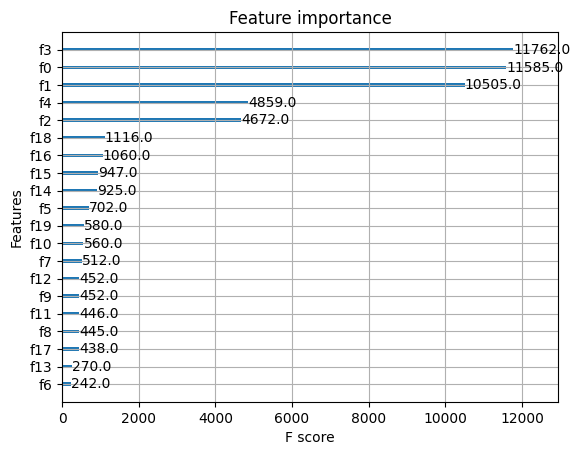

In [47]:
xgb.plot_importance(xgb_reg)

In [49]:
df_dummies.columns

Index([   'satisfaction_level',       'last_evaluation',
              'number_project',  'average_montly_hours',
          'time_spend_company',         'Work_accident',
                        'left', 'promotion_last_5years',
                             0,                       1,
                             2,                       3,
                             4,                       5,
                             6,                       7,
                             8,                       9,
                             0,                       1,
                             2],
      dtype='object')

### **CatBoost**

In [16]:
# Create a CatBoostRegressor model
catboost_reg = CatBoostRegressor(iterations=1000, depth=7, learning_rate=0.5, loss_function="MAE", verbose=200, random_seed=380)

# Train the model on the training data
catboost_reg.fit(X_train, y_train)

# Make predictions on the test data
y_pred_cbr = catboost_reg.predict(X_test)

# Evaluate the model
mae = mean_squared_error(y_test, y_pred_cbr)
r2 = r2_score(y_test, y_pred_cbr)

metric_cbr = {
    "Mean Squared Error": mae,
    "R2 Score": r2,
    "Best Score": catboost_reg.get_best_score()
}

for key, value in metric_cbr.items():
    print(f"{key}: {value}")
    print("-"*50)

print("Mean Squared Error:", mae)
print("R2 Score:", r2)

0:	learn: 0.1589918	total: 51.2ms	remaining: 51.1s
200:	learn: 0.0478435	total: 670ms	remaining: 2.66s
400:	learn: 0.0457043	total: 1.23s	remaining: 1.83s
600:	learn: 0.0451442	total: 1.77s	remaining: 1.18s
800:	learn: 0.0445084	total: 2.31s	remaining: 574ms
999:	learn: 0.0440915	total: 2.88s	remaining: 0us
Mean Squared Error: 0.04344891063313763
--------------------------------------------------
R2 Score: 0.7656682685929296
--------------------------------------------------
Best Score: {'learn': {'MAE': 0.0440914871522629}}
--------------------------------------------------
Mean Squared Error: 0.04344891063313763
R2 Score: 0.7656682685929296


# **Functions**

In [51]:
def load_data(dataset_path):
    df = pd.read_csv(dataset_path)
    return df

def clean_data(df):
    # remove duplicates
    # df.drop_duplicates(inplace=True)

    # reset index
    df.reset_index(inplace=True, drop=True)

    return df

def process_data(df):
    # LabelEncoder
    label_columns = ["sales", "salary"]
    le = LabelEncoder()
    for column in label_columns:
        df[column] = le.fit_transform(df[column])

    # Convert dummies
    sales = pd.get_dummies(df["sales"])

    salary = pd.get_dummies(df["salary"])

    # Add new dummy columns to data frame
    df_dummies = pd.concat([df, sales, salary], axis=1)

    # Drop unnecessary columns
    df_dummies.drop(["sales", "salary"], axis=1, inplace=True)

    # reset index
    df_dummies.reset_index(inplace=True, drop=True)

    return df_dummies

def split_preprocessing_data(df_dummies):
    X = df_dummies.drop("left", axis=1)
    y = df_dummies["left"]

    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

    # change type
    X_train = X_train.astype(float)
    X_test = X_test.astype(float)

    X_train.columns = X_train.columns.astype(str)
    X_test.columns = X_test.columns.astype(str)

    # Scaler
    ss = StandardScaler()
    X_train = ss.fit_transform(X_train)
    X_test = ss.transform(X_test)

    return X_train, X_test, y_train, y_test

def train_model(model, X_train, y_train):
    model_obj = model
    model_obj.fit(X_train, y_train)

    return model_obj

def model_evaluation(pre_train_model, X_test, y_test, return_df=True, pipline=False):
    y_pred = pre_train_model.predict(X_test)

    metrics_dict = {
        "MAE": mean_squared_error(y_test, y_pred),
        "R2_Score": r2_score(y_test, y_pred)
    }

    if return_df and pipline==False:
        metrics_df = pd.DataFrame([metrics_dict])
        metrics_df.insert(0, "model", type(pre_train_model).__name__)

        return metrics_df

    elif return_df and pipline:
        metrics_df = pd.DataFrame([metrics_dict])
        metrics_df.insert(0, "model", type(pre_train_model.best_estimator_.steps[-1][-1]).__name__)

        return metrics_df

    else:
        return metrics_dict

def model_comparison(models):
    df = load_data("/content/drive/MyDrive/Colab Notebooks/Filoger/tamrin_quera/ML/Regression/Ex_11/HR.csv")
    df_cleaned = clean_data(df)
    df_processed = process_data(df_cleaned)

    X_train, X_test, y_train, y_test = split_preprocessing_data(df_processed)

    results = []
    for model in models:
        model_t = train_model(model, X_train, y_train)
        results.append(model_evaluation(model_t, X_test, y_test))

    results_df = pd.concat(results, ignore_index=True).sort_values(by="R2_Score", ascending=False).reset_index(drop=True)
    return results_df.style.background_gradient(cmap='coolwarm')

In [52]:
# Define models
models = [
    DecisionTreeRegressor(),
    SVR(),
    KNeighborsRegressor(),
    RandomForestRegressor(random_state=42),
    AdaBoostRegressor(random_state=42),
    xgb.XGBRegressor(colsample_bytree=0.8, learning_rate=0.1, max_depth=6, n_estimators=1000, verbosity=3, random_state=42),
    CatBoostRegressor(iterations=1000, depth=7, learning_rate=0.5, loss_function="MAE", verbose=200, random_seed=380)
]

# Run model comparison
model_comparison(models)

[07:59:26] DEBUG: ../src/gbm/gbtree.cc:157: Using tree method: 2
[07:59:26] INFO: ../src/tree/updater_prune.cc:98: tree pruning end, 60 extra nodes, 0 pruned nodes, max_depth=6
[07:59:26] INFO: ../src/tree/updater_prune.cc:98: tree pruning end, 64 extra nodes, 0 pruned nodes, max_depth=6
[07:59:26] INFO: ../src/tree/updater_prune.cc:98: tree pruning end, 64 extra nodes, 0 pruned nodes, max_depth=6
[07:59:26] INFO: ../src/tree/updater_prune.cc:98: tree pruning end, 64 extra nodes, 0 pruned nodes, max_depth=6
[07:59:26] INFO: ../src/tree/updater_prune.cc:98: tree pruning end, 64 extra nodes, 0 pruned nodes, max_depth=6
[07:59:26] INFO: ../src/tree/updater_prune.cc:98: tree pruning end, 68 extra nodes, 0 pruned nodes, max_depth=6
[07:59:26] INFO: ../src/tree/updater_prune.cc:98: tree pruning end, 72 extra nodes, 0 pruned nodes, max_depth=6
[07:59:27] INFO: ../src/tree/updater_prune.cc:98: tree pruning end, 60 extra nodes, 0 pruned nodes, max_depth=6
[07:59:27] INFO: ../src/tree/updater_pr

,model,MAE,R2_Score
0,XGBRegressor,0.012670,0.930376
1,RandomForestRegressor,0.014488,0.920387
2,CatBoostRegressor,0.024752,0.863988
3,DecisionTreeRegressor,0.026400,0.854932
4,AdaBoostRegressor,0.042436,0.766816
5,KNeighborsRegressor,0.043627,0.760271
6,SVR,0.049763,0.726550


# **Hyperparameter Tuning**

In [ ]:
df2 = load_data("/content/drive/MyDrive/Colab Notebooks/Filoger/tamrin_quera/ML/Regression/Ex_11/HR.csv")
df_cleaned = clean_data(df2)
df_processed = process_data(df_cleaned)
X_train, X_test, y_train, y_test = split_preprocessing_data(df_processed)

In [ ]:
pipe_dtr = Pipeline([
    ("scl", StandardScaler()),
    ("DTR", DecisionTreeRegressor())
])

pipe_svmr = Pipeline([
    ("scl", StandardScaler()),
     ("SVR", SVR())
])

pipe_knnr = Pipeline([
    ("scl", StandardScaler()),
    ("KNNR", KNeighborsRegressor())
])

pipe_rfr = Pipeline([
    ("scl", StandardScaler()),
    ("RFR", RandomForestRegressor(random_state=42))
])

pipe_adaboostr = Pipeline([
    ("scl", StandardScaler()),
    ("AdaboostR", AdaBoostRegressor(random_state=42))
])

pipe_xgbr = Pipeline([
    ("scl", StandardScaler()),
    ("XGBR", xgb.XGBRegressor(random_state=42))
])

pipe_cbr = Pipeline([
    ("scl", StandardScaler()),
    ("CBR", CatBoostRegressor(random_state=42))
])

In [ ]:
param_range = [1, 2, 3, 4, 5, 6]
param_range_fl = [1.0, 0.5, 0.1]
n_estimators = [50, 100, 150, 200, 1000]
learning_rates = [.1, .2, .3]


dtr_param_grid = [{
    'DTR__criterion': ['mse', 'friedman_mse', 'mae', 'poisson'],
    'DTR__min_samples_leaf': param_range,
    'DTR__max_depth': param_range,
    'DTR__min_samples_split': param_range[1:]
}]


rfr_param_grid = [{
    'RFR__min_samples_leaf': param_range,
    'RFR__max_depth': param_range,
    'RFR__min_samples_split': param_range[1:],
    'RFR__min_samples_leaf': param_range[:4],
    'RFR__n_estimators': n_estimators
}]


knnr_param_grid = [{
    'KNNR__n_neighbors': param_range,
    'KNNR__weights': ['uniform', 'distance'],
    'KNNR__metric': ['euclidean', 'manhattan']
}]


svmr_param_grid = [{
    'SVR__kernel': ['linear', 'rbf'],
    'SVR__C': param_range,
}]


xgbr_param_grid = [{
    'XGBR__learning_rate': learning_rates,
    'XGBR__max_depth': param_range,
    'XGBR__min_child_weight': param_range[:2],
    'XGBR__subsample': param_range_fl,
    'XGBR__n_estimators': n_estimators
}]

cbr_param_grid = [{
    'CBR__depth'         : [6,8,10],
    'CBR__learning_rate' : learning_rates,
    'CBR__iterations'    : n_estimators
}]

In [ ]:
dtr_grid_search = GridSearchCV(
    estimator=pipe_dtr,
    param_grid=dtr_param_grid,
    scoring='r2',
    cv=3,
    n_jobs=-1,
    verbose=10
)

rfr_grid_search = GridSearchCV(
    estimator=pipe_rfr,
    param_grid=rfr_param_grid,
    scoring='r2',
    cv=3,
    n_jobs=-1,
    verbose=10
)

knnr_grid_search = GridSearchCV(
    estimator=pipe_knnr,
    param_grid=knnr_param_grid,
    scoring='r2',
    cv=3,
    n_jobs=-1,
    verbose=10
)

svmr_grid_search = GridSearchCV(
    estimator=pipe_svmr,
    param_grid=svmr_param_grid,
    scoring='r2',
    cv=3,
    n_jobs=-1,
    verbose=10
)

xgbr_grid_search = GridSearchCV(
    estimator=pipe_xgbr,
    param_grid=xgbr_param_grid,
    scoring='r2',
    cv=3,
    n_jobs=-1,
    verbose=10
)

cbr_grid_search = GridSearchCV(
    estimator=pipe_cbr,
    param_grid=cbr_param_grid,
    scoring='r2',
    cv=3,
    n_jobs=-1,
    verbose=10
)

In [ ]:
grids = [
    # dtr_grid_search,
    # rfr_grid_search,
    # knnr_grid_search,
    # svmr_grid_search,
    # xgbr_grid_search,
    cbr_grid_search
]

for pipe in grids:
    pipe.fit(X_train,y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits
0:	learn: 0.3907568	total: 11.2ms	remaining: 11.2s
1:	learn: 0.3593481	total: 21.5ms	remaining: 10.8s
2:	learn: 0.3323080	total: 27.4ms	remaining: 9.1s
3:	learn: 0.3073341	total: 37.1ms	remaining: 9.23s
4:	learn: 0.2859415	total: 47.5ms	remaining: 9.46s
5:	learn: 0.2669633	total: 56.4ms	remaining: 9.35s
6:	learn: 0.2499196	total: 65.3ms	remaining: 9.26s
7:	learn: 0.2354831	total: 74.5ms	remaining: 9.23s
8:	learn: 0.2223680	total: 83.5ms	remaining: 9.2s
9:	learn: 0.2106608	total: 92.2ms	remaining: 9.13s
10:	learn: 0.2006266	total: 101ms	remaining: 9.1s
11:	learn: 0.1918484	total: 110ms	remaining: 9.06s
12:	learn: 0.1842603	total: 119ms	remaining: 9.03s
13:	learn: 0.1775883	total: 128ms	remaining: 9.04s
14:	learn: 0.1722181	total: 137ms	remaining: 8.99s
15:	learn: 0.1672585	total: 146ms	remaining: 8.95s
16:	learn: 0.1628441	total: 155ms	remaining: 8.95s
17:	learn: 0.1590546	total: 164ms	remaining: 8.94s
18:	learn: 0.1559364	to

In [ ]:
grid_dict1 = {0: 'Decision Trees', 1: 'Random Forest', 2: 'K-Nearest Neighbors',
             3: 'Support Vector Machines', 4: 'XGBoost'}
for i, model in enumerate(grids):
    print('{} Test Accuracy: {}'.format(grid_dict1[i], model.score(X_test,y_test)))
    print('{} Best Params: {}'.format(grid_dict1[i], model.best_params_))
    print('-'*100)

Decision Trees Test Accuracy: 0.9338767323790418
Decision Trees Best Params: {'CBR__depth': 10, 'CBR__iterations': 1000, 'CBR__learning_rate': 0.1}
----------------------------------------------------------------------------------------------------


In [ ]:
grid_dict2 = {0: 'Logistic Regression', 1: 'Decision Trees',
             2: 'Random Forest', 3: 'K-Nearest Neighbors',
             4: 'Support Vector Machines', 5: 'XGBoost'}

pd.concat([model_evaluation(model, X_test, y_test, return_df=True, pipline=True) for i, model in enumerate(grids)], ignore_index=True).style.background_gradient(cmap='coolwarm')

,model,MAE,R2_Score
0,CatBoostRegressor,0.012033,0.933877
